🌟 **Exercise 6 (optional)** : Visualizing Predictions on the MNIST Dataset

Train a simple neural network using TensorFlow/Keras on the MNIST dataset. After training, visualize some of the predictions made by the model.

**Dataset:** The MNIST dataset is included in TensorFlow/Keras.

**Here are the steps for this exercise :**

0. **Import Required Libraries :** Import TensorFlow, NumPy, Matplotlib, and other necessary Keras modules.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

1. **Load the MNIST dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

2. **Normalize the data :** Scale the pixel values to the range [0, 1].

In [3]:
x_train = tf.cast(x_train, tf.float32) / 255.0 # Normalize pixel values
x_test = tf.cast(x_test, tf.float32) / 255.0

3. **One-hot encode the labels :** Convert the class labels (digits 0–9) into one-hot encoded vectors.

In [4]:
y_train = tf.one_hot(y_train, depth=10)  # One-hot encode labels
y_test = tf.one_hot(y_test, depth=10)

4. **Build the model :** Create a model with a Flatten layer to convert each image to a vector, a dense layer with 128 neurons and ReLU activation and an output Dense layer with 10 neurons and softmax activation.

In [5]:
My_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=128, activation='relu'),                    # Hidden layer : A layer with 128 neurons and reLU activation.
    keras.layers.Dense(units=10, activation='softmax')                   # Output layer :  Outputs 10 probabilities (one for each class).
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5. **Compile the model using the following settings:**

**Optimizer:** ‘adam’

**Loss:** ‘categorical_crossentropy’

**Metric:** ‘accuracy’

In [6]:
My_model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

6. **Fit the model on the training data**

In [7]:
My_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8805 - loss: 0.4269 - val_accuracy: 0.9577 - val_loss: 0.1487
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9636 - loss: 0.1208 - val_accuracy: 0.9688 - val_loss: 0.0973
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9755 - loss: 0.0794 - val_accuracy: 0.9754 - val_loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9833 - loss: 0.0552 - val_accuracy: 0.9728 - val_loss: 0.0860
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9871 - loss: 0.0418 - val_accuracy: 0.9774 - val_loss: 0.0739


7. **Make predictions :** Use the trained model to predict the labels of the test images

In [8]:
predictions = My_model.predict(x_test)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[2.17878849e-07 9.45506962e-09 1.66455027e-06 ... 9.99859095e-01
  1.20697081e-07 3.82306571e-05]
 [2.77293050e-10 2.23230920e-04 9.99775887e-01 ... 3.18743491e-12
  6.36208028e-07 1.10994668e-11]
 [2.67315068e-06 9.95984256e-01 5.03508025e-04 ... 2.02429737e-03
  1.08395680e-03 3.78577511e-06]
 ...
 [1.27878385e-14 6.76461231e-12 1.19322813e-12 ... 2.93210746e-07
  5.06394704e-09 8.50802608e-05]
 [3.73650586e-08 1.10038860e-10 9.13172836e-12 ... 1.55531776e-09
  1.10724919e-04 1.10639975e-09]
 [2.12975706e-07 4.62275912e-10 6.40011111e-09 ... 1.00958055e-12
  9.69342162e-10 9.30348784e-11]]


8. **Visualize some predictions :** Display a few test images alongside the predicted labels using Matplotlib


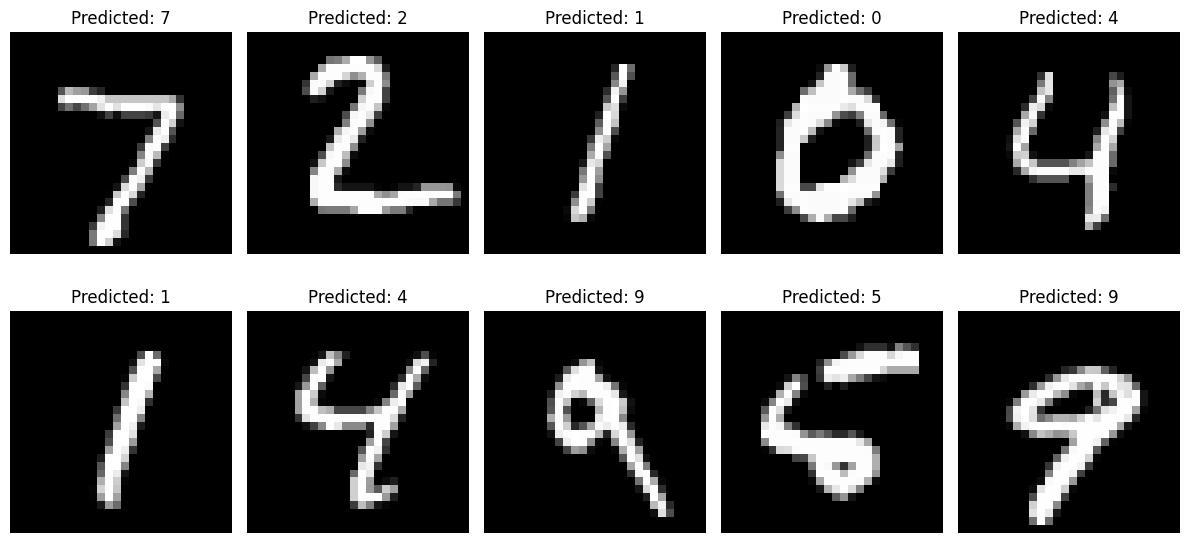

In [9]:
# Get the predicted number (class with max probability)
predicted_labels = np.argmax(predictions, axis=1)

# Show 10 test images + their prediction
plt.figure(figsize=(12, 6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
